In [1]:
import bt
import pandas
import matplotlib
import matplotlib.pyplot as plt
import talib

In [2]:
matplotlib.use('TkAgg')
%matplotlib inline

In [3]:
stock_symbol = 'goog'
start_date = '2019-11-1'
end_date = '2020-12-1'

In [4]:
# Get the price data
price_data = bt.get(stock_symbol, start=start_date, end=end_date)
# Calculate the RSI
stock_rsi = talib.RSI(price_data[stock_symbol]).to_frame()
stock_rsi.tail(5)

,0
Date,
2020-11-24,62.781224
2020-11-25,63.102335
2020-11-27,65.812832
2020-11-30,58.867863
2020-12-01,63.626883


In [5]:
# Create the same DataFrame structure as RSI
signal = stock_rsi.copy()
signal[stock_rsi.isnull()] = 0

### Construct an RSI based signal
It's time to implement your first mean-reversion strategy. Mean reversion trading uses signals to detect market imbalance, and takes long positions in an oversold market and short positions in an overbought market.

First, you will use the RSI indicator to gauge market conditions and construct the signal. If the RSI value drops below 30, you will enter long positions. If the RSI value rises above 70, you will enter short positions. If the RSI value is in between 30 and 70, you will take no positions.

In [6]:
# Construct the signal
signal[stock_rsi > 70] = -1
signal[stock_rsi < 30] = 1
signal[(stock_rsi <= 70) & (stock_rsi >= 30)] = 0

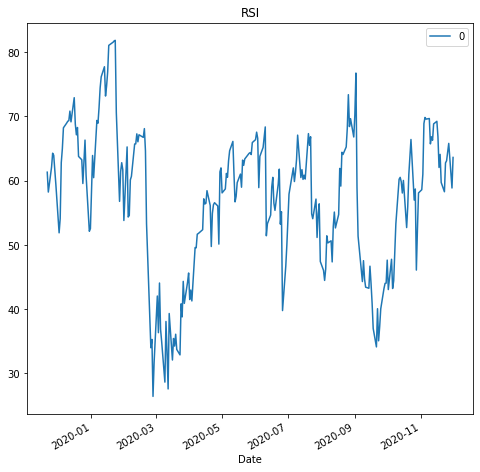

In [7]:
# Plot the RSI
stock_rsi.plot(figsize=(8,8))
plt.title('RSI')
plt.show()

<AxesSubplot:xlabel='Date'>

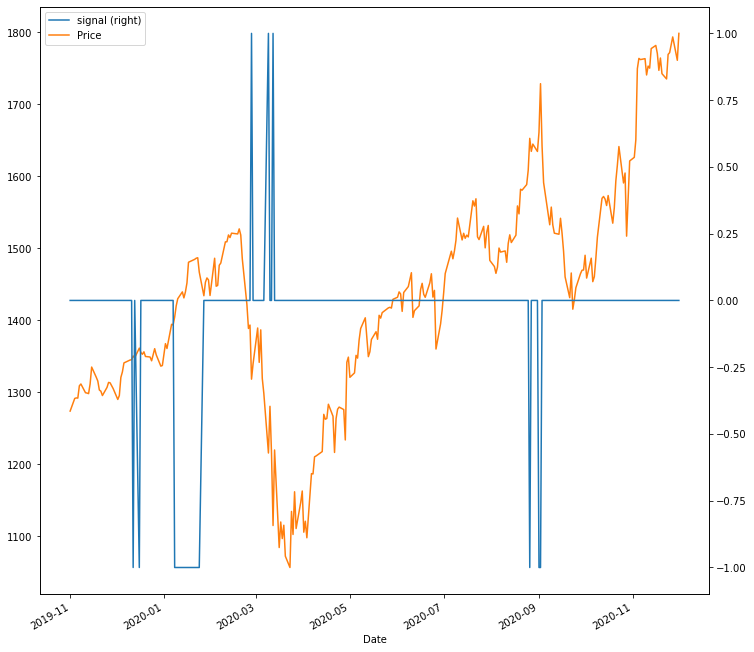

In [8]:
# Merge the data
combined_df = bt.merge(signal, price_data)
combined_df.columns = ['signal', 'Price']
combined_df.plot(secondary_y =['signal'], figsize=(12,12))



In [9]:
signal.rename(columns = {0:'goog'}, inplace = True)

In [10]:
bt_strategy = bt.Strategy('Mean_Reversion_RSI',
                         [
                             bt.algos.WeighTarget(signal),
                             bt.algos.Rebalance()
                         ])

In [11]:
bt_backtest = bt.Backtest(bt_strategy, price_data)

In [12]:
bt_results = bt.run(bt_backtest)

<AxesSubplot:title={'center':'Backtest Mean Reversion Plot'}>

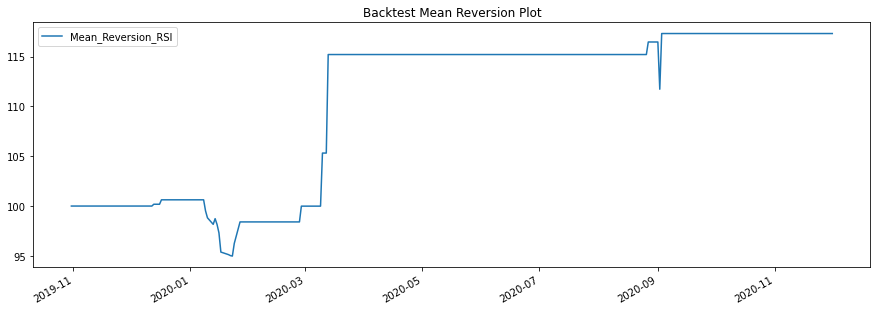

In [13]:
bt_results.plot(title='Backtest Mean Reversion Plot')